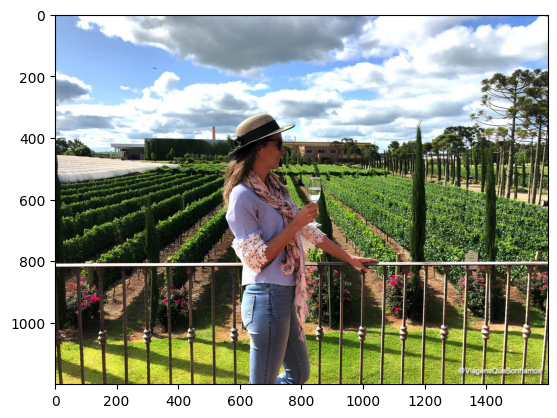

In [2]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('vinho.jpg'))

## Faz a análise, limpeza e tratamento dos dados de vinho tinto

- Arquivo de características de vinho tinto
https://www.kaggle.com/code/renanneves/wine-quality-uma-intro-ao-dataset/output

Este conjunto de dados está relacionado com variantes tintas do vinho verde português. Para mais detalhes, consulte a referência [Cortez et al., 2009]. Devido a questões de privacidade e logística, apenas variáveis ​​físico-químicas (entradas) e sensoriais (saída) estão disponíveis (por exemplo, não há dados sobre tipos de uva, marca de vinho, preço de venda do vinho, etc.).

Os conjuntos de dados podem ser vistos como tarefas de classificação ou regressão. As classes são ordenadas e não balanceadas (por exemplo, há muito mais vinhos normais do que excelentes ou ruins).

Este conjunto de dados também está disponível no repositório de aprendizado de máquina da UCI, https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fc import fc_retira_outliers as rto

pd.set_option('display.max_rows', None) # permite exibição de todas as linhas
pd.set_option('display.max_columns', None) # permite exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # desativa avisos de warning

In [4]:
# le os dados do dataset recebendo em formato de dataframe
dfx = pd.read_csv('arquivos/winequality-red.csv')

In [5]:
# verifica quantas linhas e colunas o dataframe possui
dfx.shape

(1599, 12)

In [6]:
# reconhece os nomes das colunas existentes e verifica se existe algum nulo.
# pela quantidade de non-null nao existe nenhuma linha com nulos
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Verifica dados nulos/faltantes, vamos checar os nulos de uma forma diferente para confirmarmos
dfx.isnull().values.any()

False

In [8]:
# Verifica a existência de linhas duplicadas
# vemos que existem 240 linhas duplicadas vamos eliminá-las a seguir
dfx.duplicated().value_counts()

False    1359
True      240
Name: count, dtype: int64

In [9]:
# eliminando linhas duplicadas
dfx = dfx.drop_duplicates()

In [10]:
# verificando a quantidade de linhas que sobraram
dfx.shape

(1359, 12)

In [11]:
# Faz um reconhecimento das colunas e dos dados
dfx.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [12]:
# emitindo um mapa estatístico das variáveis para uma primeira avaliação
from ydata_profiling import ProfileReport

profile = ProfileReport(dfx)

#profile.to_file("arquivos_tratados/wine_quality.html")

In [13]:
# verifica algumas estatísticas de posição e dispersão
dfx.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00
mean,8.31,0.53,0.27,2.52,0.09,15.89,46.83,1.00,3.31,0.66,10.43,5.62
std,1.74,0.18,0.20,1.35,0.05,10.45,33.41,0.00,0.16,0.17,1.08,0.82
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [14]:
# inclui a primeira coluna do dataframe no final para melhorar a exclusão dos outliers
dfx['lixo'] = dfx['fixed acidity']

In [15]:
# chaca a inclusão da coluna duplicada
dfx.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,lixo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,7.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,7.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,7.9
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7.3
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,7.8
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,7.5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,6.7


In [16]:
# chama função para retirar outliers
'''
i=0
while i != dfx.shape:
    i= dfx.shape
    dfx = rto.retira_outliers(dfx)
'''   

dfx = rto.retira_outliers(dfx)

In [17]:
# verifica quantos registros ainda temos
dfx.shape

(1005, 13)

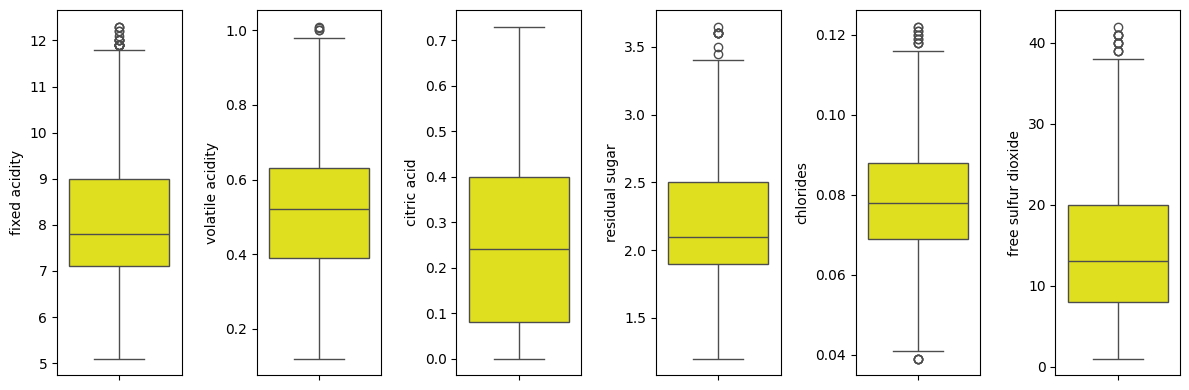

In [18]:
# visualizando boxplot para ver a distribuição nos quartis e a existência de outliers
# os outliers que sobraram não apresentam muita distorção, vamos mantê-los para não diminuir muito nossa
# base de dados
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(12, 4), tight_layout=True)

search_outliers = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                   'chlorides', 'free sulfur dioxide']

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=dfx, ax=axs[i], color='yellow')
plt.show()

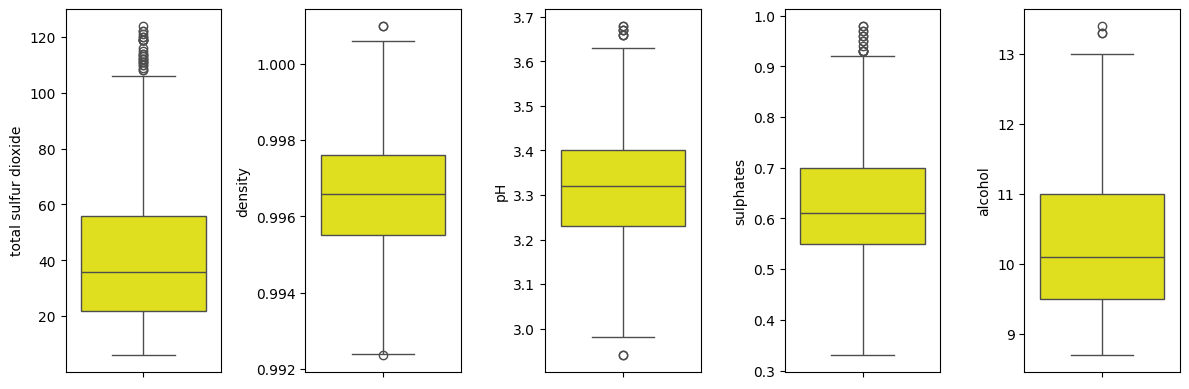

In [19]:
# visualizando boxplot para ver a distribuição nos quartis e a existência de outliers
# os outliers que sobraram não apresentam muita distorção, vamos mantê-los para não diminuir muito nossa
# base de dados
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 4), tight_layout=True)

search_outliers = ['total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=dfx, ax=axs[i], color='yellow')
plt.show()

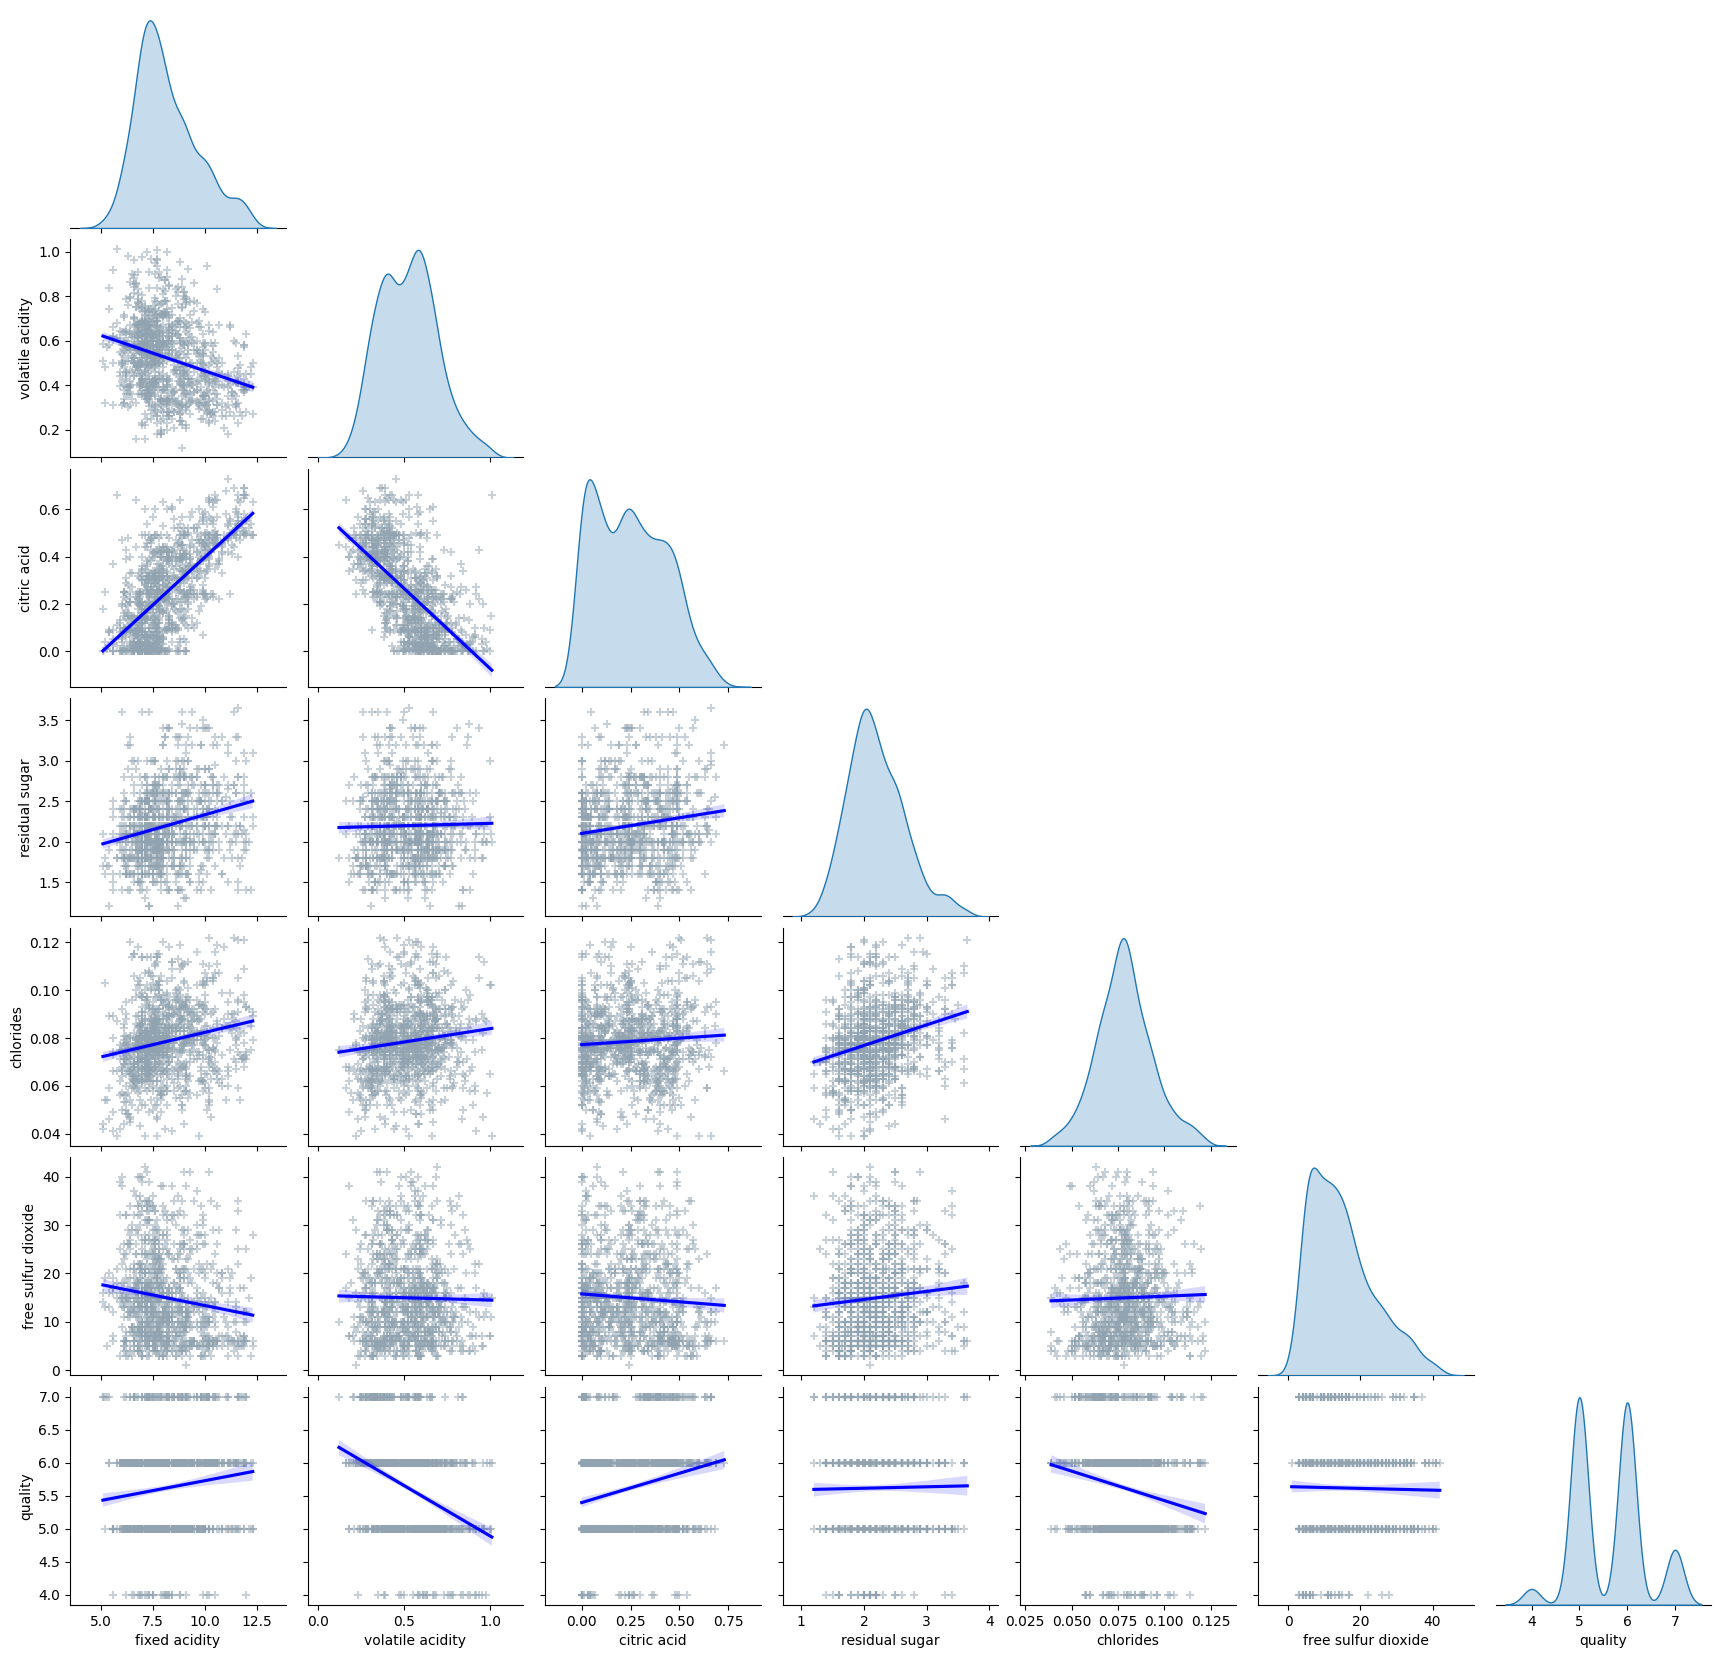

In [20]:
# verificando a distribuição dos dados
p= sns.pairplot(dfx[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                   'chlorides', 'free sulfur dioxide', 'quality']],
                diag_kind="kde", corner=True, markers="+",
                plot_kws={'line_kws':{'color':'#0000ff'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#91a3b0'}},
                kind='reg'
                );
p.fig.subplots_adjust(top=0.95)

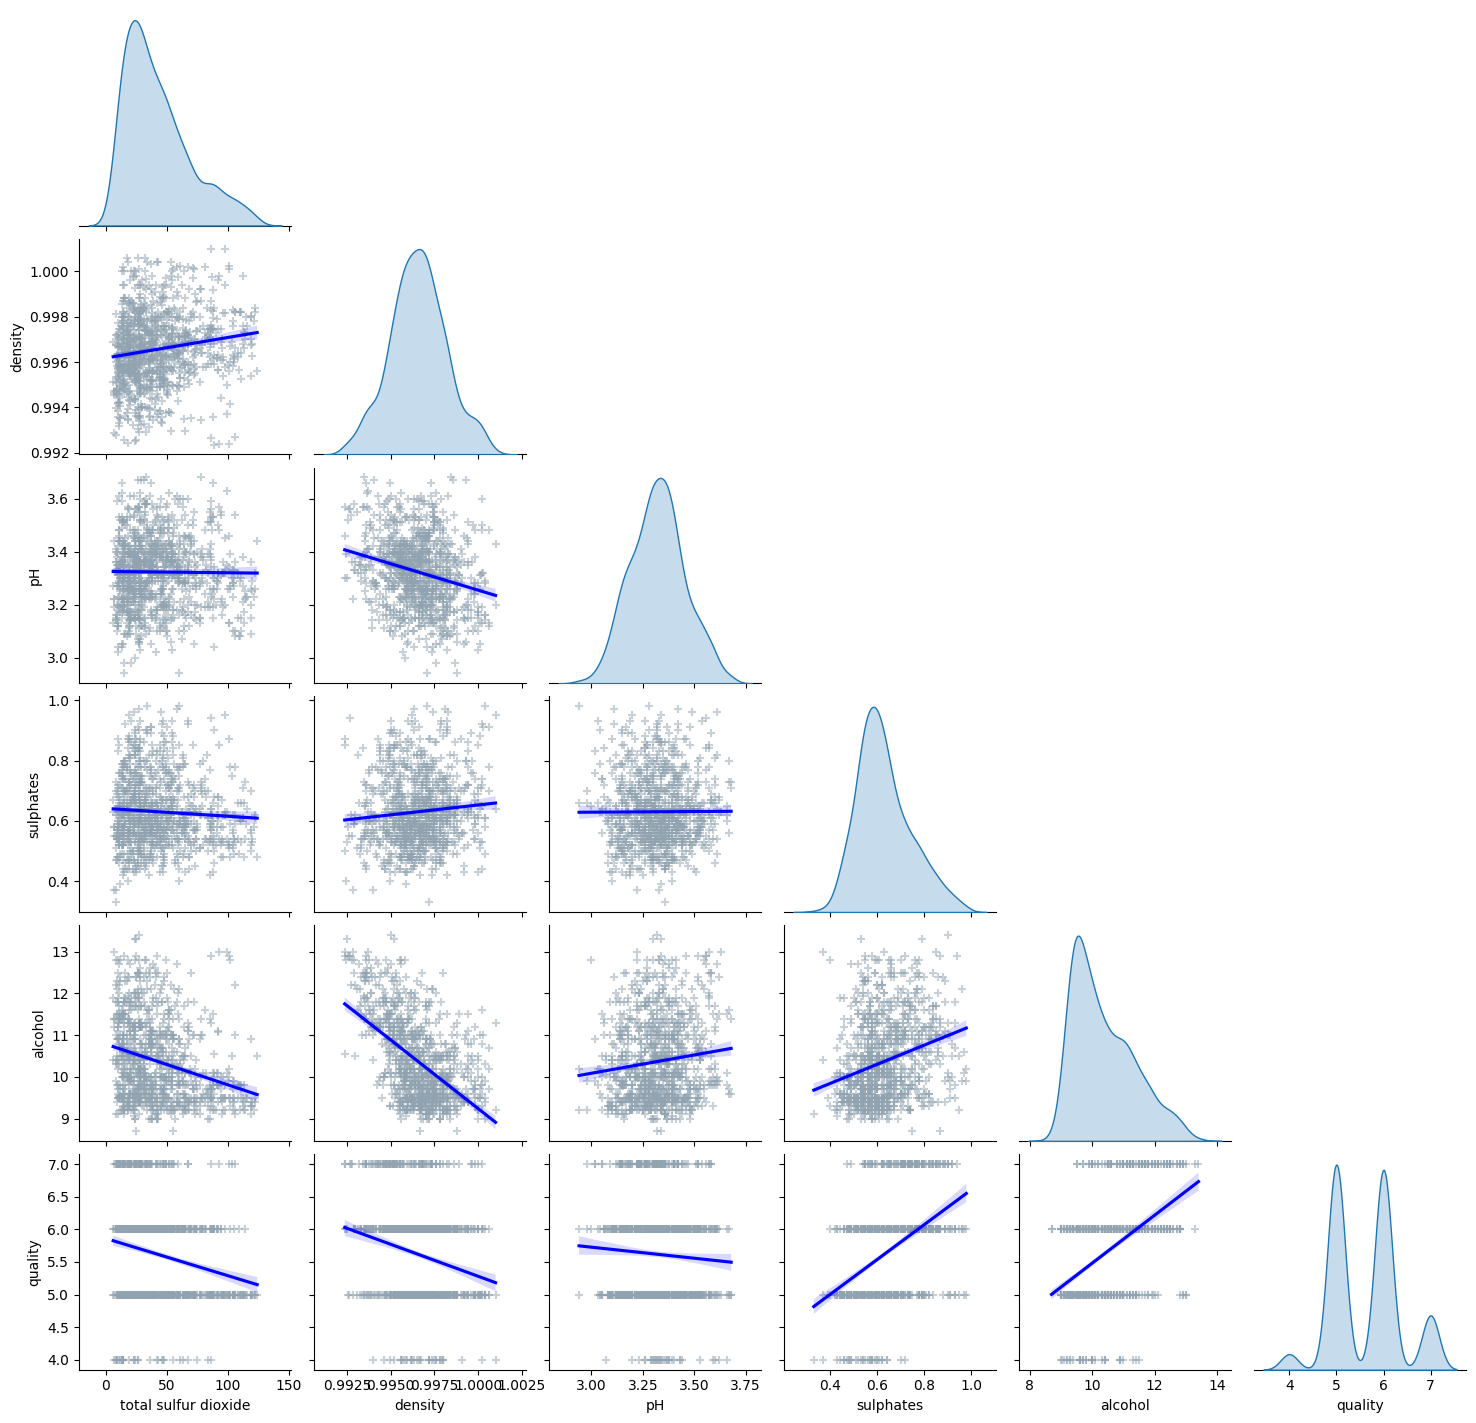

In [21]:
# verificando a distribuição dos dados
p= sns.pairplot(dfx[['total sulfur dioxide', 'density', 'pH', 
                   'sulphates', 'alcohol', 'quality']],
                diag_kind="kde", corner=True, markers="+",
                plot_kws={'line_kws':{'color':'#0000ff'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#91a3b0'}},
                kind='reg'
                );
p.fig.subplots_adjust(top=0.95)

<Axes: >

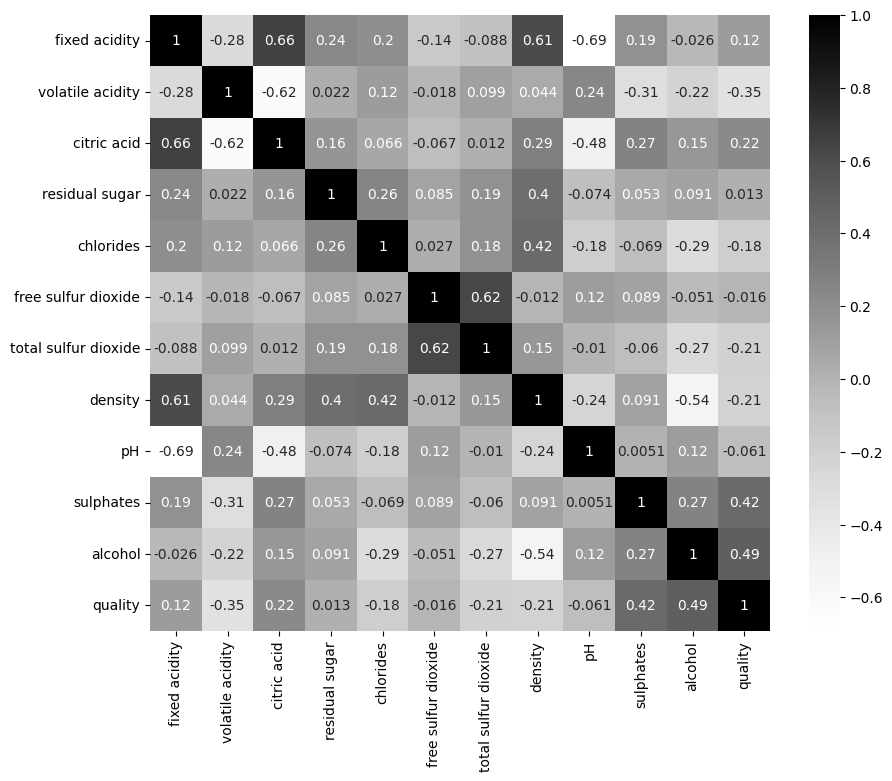

In [22]:
# checando a correlação entre os valores
fig,ax = plt.subplots(figsize=(10,8))

sns.heatmap(dfx[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
                 'sulphates', 'alcohol', 'quality']].
            corr().round(4), annot=True, cmap="Grays")

In [23]:
# vamos selecionar somente as colunas cujos dados apresentam uma melhor correlação com quality
dfx = dfx[['volatile acidity', 'citric acid', 'density', 'sulphates', 'alcohol', 'quality']]

In [24]:
# verifica os tipos de quality
dfx['quality'].value_counts()

quality
5.0    434
6.0    423
7.0    115
4.0     33
Name: count, dtype: int64

In [25]:
# salva os dados tratados em arquivo csv organizado por data
dfx.sort_index().to_csv('arquivos_tratados/df_winequality-red.csv', index=False)